In [ ]:
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


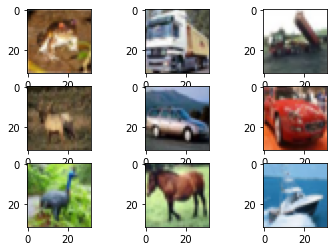

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255 
x_test /=255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


In [ ]:
model_im = Sequential()
model_im.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape = (32,32,3)))
model_im.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model_im.add(MaxPooling2D((2,2)))

model_im.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same')) 
model_im.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model_im.add(MaxPooling2D((2,2)))

model_im.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same')) #POOLING LAYER 128 TIME
model_im.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model_im.add(MaxPooling2D((2,2)))

model_im.add(Flatten())
model_im.add(Dense(128,activation = 'relu', kernel_initializer='he_uniform'))
model_im.add(Dense(10,activation = 'softmax'))
model_im.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.01,momentum=0.9) #toc do hoc 0.01, momen dong luong 0.9
model_im.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model_im.fit(x_train,y_train,batch_size=64,epochs=1,verbose=1,validation_data=(x_test,y_test))

782/782 [==============================] - 365s 466ms/step - loss: 1.6715 - accuracy: 0.3886 - val_loss: 1.3536 - val_accuracy: 0.5148


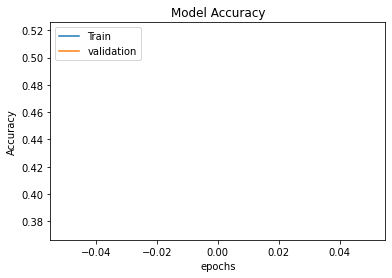

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
model_im.save('cifar10_71.h5')
model123 = load_model('cifar10_71.h5')

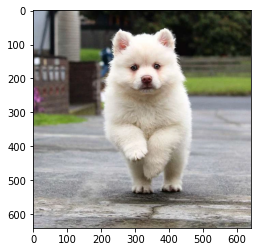

Day la con cho


In [15]:
filename= 'dog.webp' 

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (32,32))
img = img_to_array(img)
img =  img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model123.predict(img),axis= -1)
if kq==0:
  print('Day la may bay')
elif kq ==1:
  print('Day la xe hoi')
elif kq ==2:
  print('Day la con chim')
elif kq ==3:
  print('Day la con meo')
elif kq ==4:
  print('Day la con huou')
elif kq ==5:
  print('Day la con cho')
elif kq ==6:
  print('Day la con ech')
elif kq ==7:
  print('Day la con ngua')
elif kq ==8:
  print('Day la thuyen')
elif kq ==9:
  print('Day la xe tai')

# Mục mới